# <p align=center>  Drug consumption and personality 

<p align=center> University of Chicago
<p align=center> MACS 30100 (Winter 2024) Perspectives on Computational Modeling
<p align=center> Natasha Isabella Carpio Castellanos


In [421]:
#Import libraries
import numpy as np 
import pandas as pd
import graphviz
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import Recall

#Load dataset
drugs = pd.read_csv("Drug_Consumption.csv")

#Source of dataset
url = 'https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci'

## <p align=center> Part I. Exploratory Data Analysis (EDA)

**1. Understand the dataset**


In [422]:
display(drugs)
print("Shape of data frame is:")
print(drugs.shape)
print("\n")
print("Names of the columns are:")
print(drugs.columns)
print("\n")
print("Types of data in each column:")
print(drugs.dtypes)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


Shape of data frame is:
(1884, 32)


Names of the columns are:
Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')


Types of data in each column:
ID             int64
Age           object
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh    

Coding for drugs consumption, according to the authors who collected the data
* CL0: Never Used  
* CL1: Used over a Decade Ago 
* CL2: Used in Last Decade
* CL3: Used in Last Year
* CL4: Used in Last Month
* CL5: Used in Last Week 
* CL6: Used in Last Day 

Meaning of Personality data

* Nscore (Neuroticism, measured by NEO-FFI-R)
* Escore (Extraversion, measured by NEO-FFI-R)
* Oscore (Openness to experience, measured by NEO-FFI-R)
* AScore (Agreeableness, measured by NEO-FFI-R)
* Cscore (Conscientiousness, measured by NEO-FFI-R)
* Impulsive (Impulsiveness measured by BIS-11)
* SS (sensation seeking measured by ImpSS)

**2. Data cleaning**

* Check for missing values

In [423]:
drugs.isnull().sum()

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
AScore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Mushrooms    0
Nicotine     0
Semer        0
VSA          0
dtype: int64

Remove columns for ID and legal drugs (Alcohol, Caffeine, Chocolate, Cannabis, Benzos, Nicotine) since the focus is going to be on illegal drugs consumption

In [424]:
remove_col = ["ID", "Alcohol", "Caff", "Cannabis", "Choc", "Benzos", "Nicotine"]
drugs.drop(remove_col, axis=1, inplace= True)

According to the authors who collected the data, "Semeron" is a ficticious drug which was introduced on the survey to identify over-claimers. For that reason, all samples of people who answered anything other than "CL0" (Never used) are going to be removed.

In [425]:
#See who those people are
display(drugs[drugs["Semer"] != "CL0"])

#Remove and confirm the rows have been eliminated
print("Dataframe shape before eliminating over-claimers:")
print(drugs.shape)
drugs.drop(drugs[drugs["Semer"] != "CL0"].index, inplace=True)
print("Dataframe shape after eliminating over-claimers:")
print(drugs.shape)

#Drop the column
drugs.drop("Semer", axis=1, inplace= True)



,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Semer,VSA
726,25-34,F,Left school at 16 years,Australia,White,-0.58016,0.32197,0.14143,-0.60633,0.12331,...,CL2,CL2,CL2,CL2,CL0,CL4,CL2,CL6,CL2,CL2
816,18-24,M,"Some college or university, no certificate or ...",Australia,Asian,-0.67825,1.74091,0.72330,0.13136,0.41594,...,CL0,CL3,CL0,CL0,CL0,CL5,CL0,CL5,CL3,CL0
1515,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,-0.80615,-1.27553,-1.34289,-1.92173,...,CL2,CL1,CL2,CL1,CL2,CL1,CL2,CL4,CL3,CL1
1532,18-24,F,"Some college or university, no certificate or ...",USA,Other,-0.46725,0.80523,0.29338,2.03972,1.81175,...,CL0,CL4,CL0,CL4,CL3,CL2,CL0,CL3,CL4,CL3
1697,35-44,F,University degree,USA,White,1.98437,-0.80615,2.15324,0.76096,-0.00665,...,CL0,CL2,CL0,CL2,CL2,CL2,CL0,CL2,CL2,CL0
1768,18-24,M,Left school at 18 years,USA,Mixed-White/Black,-0.34799,1.28610,1.06238,-0.01729,-0.52745,...,CL0,CL3,CL0,CL4,CL3,CL6,CL3,CL3,CL1,CL3
1805,18-24,F,Left school at 17 years,USA,White,1.23461,1.11406,1.06238,-1.47955,0.12331,...,CL2,CL4,CL2,CL1,CL4,CL1,CL0,CL1,CL1,CL2
1822,18-24,F,University degree,USA,White,0.22393,-0.30033,0.88309,1.28610,-0.00665,...,CL0,CL0,CL0,CL0,CL2,CL3,CL0,CL3,CL2,CL0


Dataframe shape before eliminating over-claimers:
(1884, 25)
Dataframe shape after eliminating over-claimers:
(1876, 25)


In [426]:
#Reset the index to account for the deleted rows
drugs.reset_index(inplace=True)

In [427]:
drugs.drop("index", axis=1, inplace=True)
drugs

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,...,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,VSA
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL0
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL0
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL0
4,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,...,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL5
1872,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,...,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL0
1873,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,...,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL0
1874,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,...,CL0,CL0,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL0


* Convert non-numerical data to categorical type

In [428]:
cat_col = ["Age", "Gender", "Education", "Country", "Ethnicity", "Amphet", 
           "Amyl", "Coke", "Crack", "Ecstasy", "Heroin", "Ketamine", "Legalh",
           "LSD", "Meth", "Mushrooms", "VSA"]
drugs[cat_col] = drugs[cat_col].astype('category')

* Check current feature types

In [429]:
print("Types of data in each column:")
print(drugs.dtypes)

Types of data in each column:
Age          category
Gender       category
Education    category
Country      category
Ethnicity    category
Nscore        float64
Escore        float64
Oscore        float64
AScore        float64
Cscore        float64
Impulsive     float64
SS            float64
Amphet       category
Amyl         category
Coke         category
Crack        category
Ecstasy      category
Heroin       category
Ketamine     category
Legalh       category
LSD          category
Meth         category
Mushrooms    category
VSA          category
dtype: object


* Categorical data columns: 
    * Demographic data: Age, Gender, Education, Country, Ethnicity
    * Drug consumption data: Amphet, Amyl, Coke, Crack, Ecstasy, Heroin, Ketamine, Legalh, LSD, Meth, Mushrooms, VSA
* Numerical data columns:
    * Personality data: Nscore, Escore, Oscore, AScore, Cscore, Impulsive, SS 

* Detect and handle outliers for the demographic categorical data: Age, Gender, Education, Country and Ethnicity

In [430]:
drugs['Age'].value_counts()

18-24    637
25-34    480
35-44    354
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

In [431]:
drugs['Gender'].value_counts() 

M    940
F    936
Name: Gender, dtype: int64

In [432]:
drugs['Education'].value_counts() 

Some college or university, no certificate or degree    503
University degree                                       478
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 18 years                                  99
Left school at 16 years                                  98
Doctorate degree                                         89
Left school at 17 years                                  29
Left school before 16 years                              28
Name: Education, dtype: int64

In [433]:
#Merge some categories of Education
drugs['Education'].replace(['Left school at 18 years', 
                            'Left school at 17 years'],
                            "Left school at 17/18 years", inplace=True)
drugs['Education'].replace(['Left school at 16 years', 
                            'Left school before 16 years'],
                            "Left school at or before 16 years", inplace=True)

#See how it looks now
drugs['Education'].value_counts() 

Some college or university, no certificate or degree    503
University degree                                       478
Masters degree                                          283
Professional certificate/ diploma                       269
Left school at 17/18 years                              128
Left school at or before 16 years                       126
Doctorate degree                                         89
Name: Education, dtype: int64

In [434]:
drugs['Country'].value_counts() 

UK                     1043
USA                     551
Other                   118
Canada                   87
Australia                52
Republic of Ireland      20
New Zealand               5
Name: Country, dtype: int64

In [435]:
#Merge New Zealand with "Other" and name "Other country" so it doesn't conflict
#with "Other" ethnicity later after the one-hot encoding
drugs['Country'].replace(['New Zealand', "Other"], "Other country", inplace=True)

#See how it looks now
drugs['Country'].value_counts() 

UK                     1043
USA                     551
Other country           123
Canada                   87
Australia                52
Republic of Ireland      20
Name: Country, dtype: int64

In [436]:
drugs['Ethnicity'].value_counts() 

White                1715
Other                  62
Black                  33
Asian                  25
Mixed-White/Asian      19
Mixed-White/Black      19
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

In [437]:
#Due to very few samples of "Mixed-Black/Asian", merge with "Other". Also name
#merged category as "Other ethnicity" for the same reason explained above
drugs['Ethnicity'].replace(['Mixed-Black/Asian', "Other"], "Other ethnicity",
                                                                   inplace=True)

#See how it looks now
drugs['Ethnicity'].value_counts() 

White                1715
Other ethnicity        65
Black                  33
Asian                  25
Mixed-White/Asian      19
Mixed-White/Black      19
Name: Ethnicity, dtype: int64

* Detect outliers for the personality data

In [438]:
numerical_columns = ["Nscore", "Escore", "Oscore", "AScore", "Cscore", 
                                                   "Impulsive", "SS"]
drugs[numerical_columns].describe()

,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,-0.000718,-0.001646,-0.002915,-0.000169,-0.000391,0.005412,-0.006782
std,0.998682,0.997596,0.995866,0.996730,0.997923,0.954389,0.961949
min,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,0.629670,0.637790,0.723300,0.760960,0.628243,0.529750,0.765400
max,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


The data was already standardized by the authors of the database, looks good!

**3. Data transformation and feature engineering**

* Create a new column that specifies if a person has consumed, or not, any drug at any given time

In [439]:
#Convert consumption codes of drugs consumption to a binary classification:
#Used (at least once) or Never used
values_to_replace = {'CL0': 'Never used', 'CL1': 'Used', 'CL2': 'Used', 
                     'CL3': 'Used', 'CL4': 'Used', 'CL5': 'Used', 'CL6': 'Used'}
drugs.replace(values_to_replace, inplace=True)

In [440]:
# Create a new column indicating if a person has consumed at least one drug
drugs['Has used'] = drugs.apply(lambda row: 'Used' if 'Used' in row.values 
                                                else 'Never used', axis=1)

In [441]:
drugs["Has used"].value_counts()

Used          1349
Never used     527
Name: Has used, dtype: int64

According to the World Drug Report 2017, realized by the United Nation Office on Drugs and Crime, about 5% of the population used drugs at least once. Hence, the database seem odd. Considering that the original questionnaire also asked participants about other substances like chocolate of caffeine, it could be that respondents interpreted different things. For example, "Coke" could be interpreted as the Coca-Cola beverage. Therefore, we'll take a closer look at different drugs's values

In [442]:
drugs["Coke"].value_counts()


Never used    1035
Used           841
Name: Coke, dtype: int64

In [443]:
drugs["Mushrooms"].value_counts()

Never used    981
Used          895
Name: Mushrooms, dtype: int64

Other drugs like amphetamine can also be prescribed for attention-deficit hyperactivity disorder (ADHD), so its usage may be due to this

In [444]:
drugs["Amphet"].value_counts()

Never used    973
Used          903
Name: Amphet, dtype: int64

Now let's see the values for more evident "hard drugs"

In [445]:
drugs["Meth"].value_counts()

Never used    1423
Used           453
Name: Meth, dtype: int64

In [446]:
drugs["Heroin"].value_counts()

Never used    1599
Used           277
Name: Heroin, dtype: int64

In [447]:
drugs["Crack"].value_counts()

Never used    1621
Used           255
Name: Crack, dtype: int64

(No outliers are seen for the drugs data)

According to Hser et. al (2008) "Heroin, cocaine, and methamphetamine are considered “major” illicit drugs that are often associated with severe consequences, including mortality, morbidity, and criminality. For example, during 2004 the greatest portion of the 32,980 federal drug arrests in the United States involved cocaine (37%), followed by amphetamine/methamphetamine (16%) and heroin (6%)".

It could be that since these drugs are more dangerous, people engage less with them, as opposed to other "softer"/less risky drugs which may be more common to use among different types of people. Therefore, I'll restrict the model to predict the consumption of only these three major drugs.


In [448]:
#Also delete the "Has used" column so it can be created from scratch with just
#the three major drugs and using numerical encoding
remove_col = ["Amphet", "Amyl", "Coke", "Ecstasy", "Ketamine", "Legalh", "LSD",
                                                "Mushrooms", "VSA", "Has used"]
drugs.drop(remove_col, axis=1, inplace= True)

In [449]:
#See how the dataframe looks now
drugs

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Crack,Heroin,Meth
0,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,Never used,Never used,Used
1,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,Never used,Never used,Never used
2,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,Never used,Never used,Never used
3,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,Never used,Never used,Never used
4,65+,F,Left school at 17/18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,Never used,Never used,Never used
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,Never used,Never used,Never used
1872,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,Never used,Never used,Used
1873,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,Never used,Never used,Never used
1874,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,Never used,Never used,Never used


In [450]:
# Create the "Has used" column again (0 for Never used and 1 for Used)
drugs['Has used'] = drugs.apply(lambda row: 1 if 'Used' in row.values else 0, axis=1)

In [451]:
drugs["Has used"].value_counts()

0    1301
1     575
Name: Has used, dtype: int64

In [452]:
#Drop individual drugs columns and only stay with the global "Has used" column
drugs.drop(["Crack", "Heroin", "Meth"], axis=1, inplace= True)

* Visualize demographic distribution

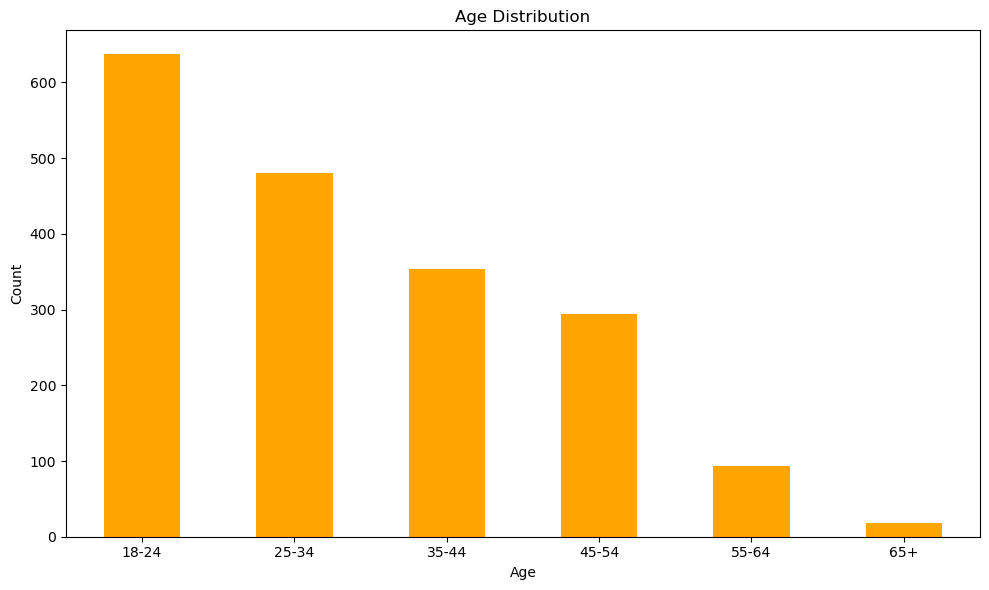

In [453]:
age_dist = drugs["Age"].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
age_dist.plot(kind='bar', color='orange')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cropping
plt.show()

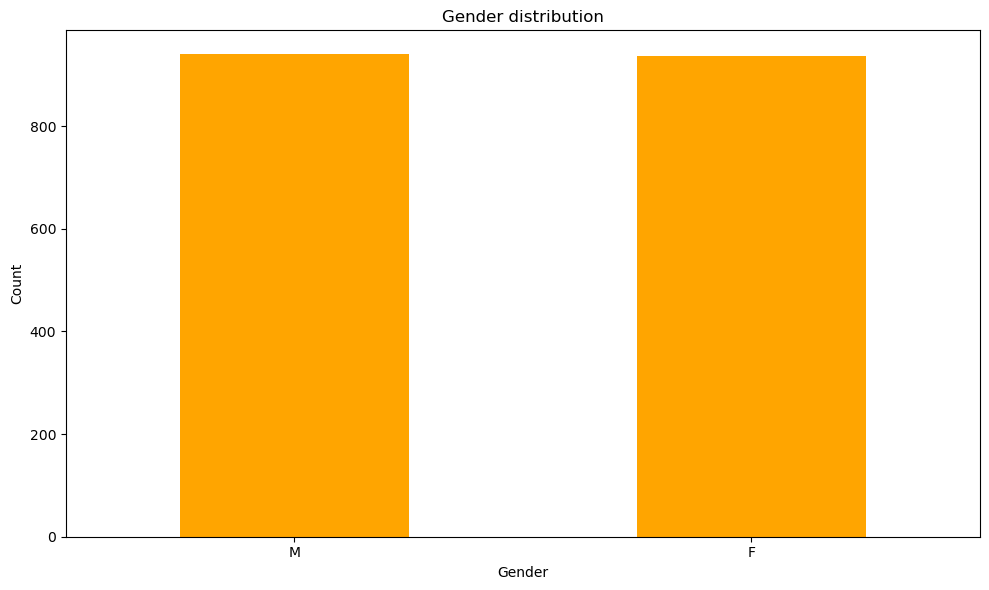

In [454]:
gender_dist = drugs["Gender"].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
gender_dist.plot(kind='bar', color='orange')
plt.title('Gender distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cropping
plt.show()

Text(0, 0.5, 'Count')

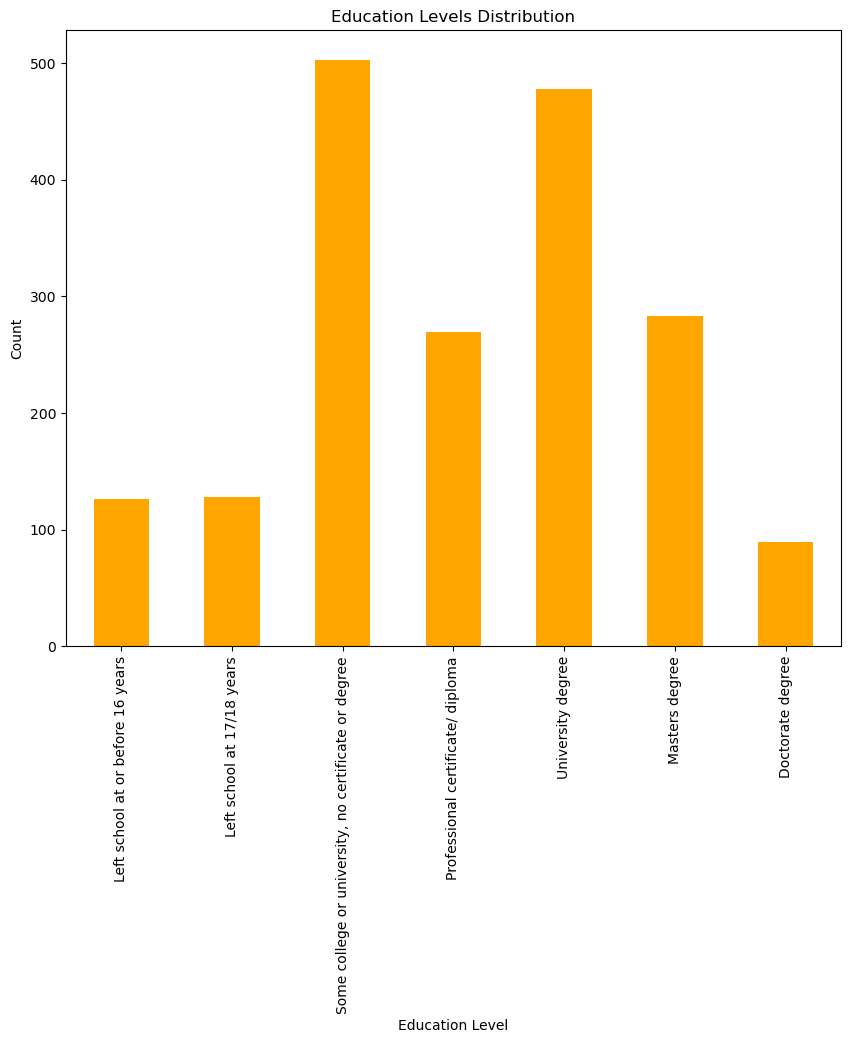

In [455]:
ed_dist = drugs["Education"].value_counts()

# Define the ordinal order of education levels
ordinal_order = ['Left school at or before 16 years', 'Left school at 17/18 years', 'Some college or university, no certificate or degree', 'Professional certificate/ diploma', 'University degree', 'Masters degree', 'Doctorate degree']

# Reindex the age_dist Series to match the ordinal order
ed_dist = ed_dist.reindex(ordinal_order)

# Create a bar plot
plt.figure(figsize=(10, 8))
ed_dist.plot(kind='bar', color='orange')
plt.title('Education Levels Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')


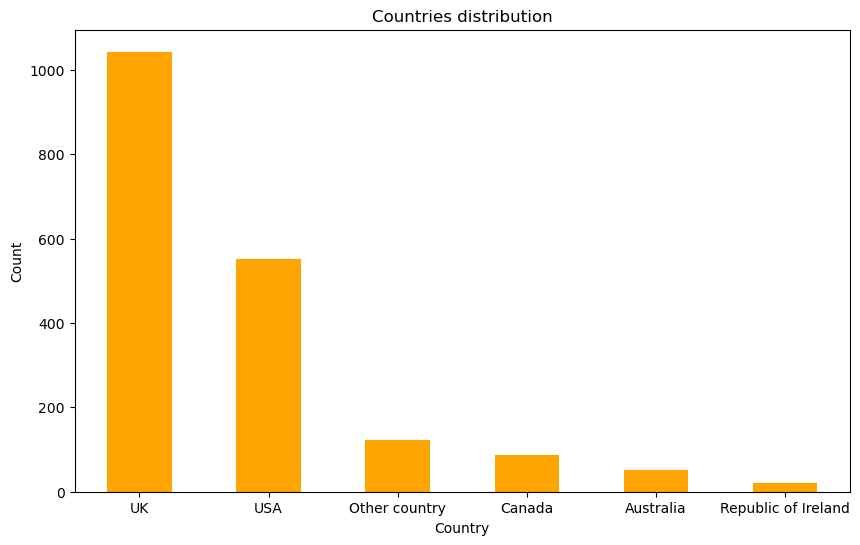

In [456]:
country_dist = drugs["Country"].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
country_dist.plot(kind='bar', color='orange')
plt.title('Countries distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

Text(0, 0.5, 'Count')

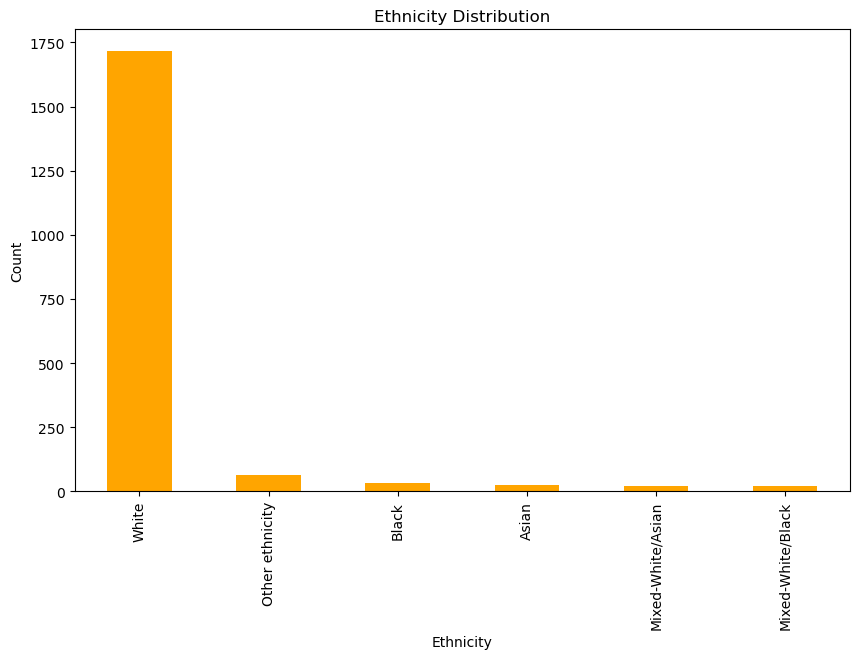

In [457]:
eth_dist = drugs["Ethnicity"].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))
eth_dist.plot(kind='bar', color='orange')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')

* Perform ordinal encoding for the Age and the Education columns

In [458]:
#Create the encoders

#Age
oe_age = OrdinalEncoder()
encoded_age = oe_age.fit_transform(drugs[['Age']])

#Education
custom_edu_order = ['Left school at or before 16 years', 
                    'Left school at 17/18 years', 
                    'Some college or university, no certificate or degree',
                    'Professional certificate/ diploma',
                    'University degree',
                    'Masters degree',
                    'Doctorate degree']

oe_edu = OrdinalEncoder(categories=[custom_edu_order])
encoded_edu = oe_edu.fit_transform(drugs[['Education']])

In [459]:
#Check categories
print(oe_age.categories_)
oe_edu.categories_

[array(['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], dtype=object)]


[array(['Left school at or before 16 years', 'Left school at 17/18 years',
        'Some college or university, no certificate or degree',
        'Professional certificate/ diploma', 'University degree',
        'Masters degree', 'Doctorate degree'], dtype=object)]

In [460]:
#Update the dataframe with the encoded values
drugs["Age"] = encoded_age
drugs["Education"] = encoded_edu

In [461]:
#Check how it looks now
drugs

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Has used
0,1.0,M,6.0,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,2.0,M,3.0,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,0.0,F,5.0,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,2.0,F,6.0,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,5.0,F,1.0,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,0.0,F,2.0,USA,White,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1872,0.0,M,2.0,USA,White,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1873,1.0,F,4.0,USA,White,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1874,0.0,F,2.0,USA,White,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


* Perform one-hot encoding for the Gender, Country and Ethnicity columns

In [462]:
#Gender
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(drugs[['Gender']])
ohe.categories_


[array(['F', 'M'], dtype=object)]

In [463]:
encoded_gender = pd.DataFrame(ohe.transform(drugs[['Gender']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})
encoded_gender

,F,M
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1871,1.0,0.0
1872,0.0,1.0
1873,1.0,0.0
1874,1.0,0.0


In [464]:
#Country
ohe.fit(drugs[['Country']])
ohe.categories_

[array(['Australia', 'Canada', 'Other country', 'Republic of Ireland',
        'UK', 'USA'], dtype=object)]

In [465]:
encoded_country = pd.DataFrame(ohe.transform(drugs[['Country']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})
encoded_country

,Australia,Canada,Other country,Republic of Ireland,UK,USA
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1871,0.0,0.0,0.0,0.0,0.0,1.0
1872,0.0,0.0,0.0,0.0,0.0,1.0
1873,0.0,0.0,0.0,0.0,0.0,1.0
1874,0.0,0.0,0.0,0.0,0.0,1.0


In [466]:
#Ethnicity
ohe.fit(drugs[['Ethnicity']])
ohe.categories_


[array(['Asian', 'Black', 'Mixed-White/Asian', 'Mixed-White/Black',
        'Other ethnicity', 'White'], dtype=object)]

In [467]:
encoded_ethnicity = pd.DataFrame(ohe.transform(drugs[['Ethnicity']]).toarray()).rename(columns={i: catg for i, catg in enumerate(ohe.categories_[0])})
encoded_ethnicity


,Asian,Black,Mixed-White/Asian,Mixed-White/Black,Other ethnicity,White
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
1871,0.0,0.0,0.0,0.0,0.0,1.0
1872,0.0,0.0,0.0,0.0,0.0,1.0
1873,0.0,0.0,0.0,0.0,0.0,1.0
1874,0.0,0.0,0.0,0.0,0.0,1.0


In [468]:
#Drop original columns so the new encoded dataframes can be added to the original
#dataframe
drugs.drop(["Gender", "Country", "Ethnicity"], axis=1, inplace= True)

In [469]:
drugs_prep = encoded_country.join([encoded_ethnicity, encoded_gender, drugs])

**Prep dataframe for machine learning**

In [470]:
drugs_prep

,Australia,Canada,Other country,Republic of Ireland,UK,USA,Asian,Black,Mixed-White/Asian,Mixed-White/Black,...,Age,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Has used
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,6.0,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,3.0,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,6.0,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,1.0,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,0
1872,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1873,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,0
1874,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,0


**4.Statistical summary**

In [471]:
drugs_prep.describe()

,Australia,Canada,Other country,Republic of Ireland,UK,USA,Asian,Black,Mixed-White/Asian,Mixed-White/Black,...,Age,Education,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Has used
count,1876.000000,1876.000000,1876.000000,1876.000000,1876.00000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,...,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000,1876.000000
mean,0.027719,0.046375,0.065565,0.010661,0.55597,0.293710,0.013326,0.017591,0.010128,0.010128,...,1.349680,3.092751,-0.000718,-0.001646,-0.002915,-0.000169,-0.000391,0.005412,-0.006782,0.306503
std,0.164209,0.210353,0.247586,0.102728,0.49699,0.455582,0.114698,0.131493,0.100153,0.100153,...,1.278042,1.556725,0.998682,0.997596,0.995866,0.996730,0.997923,0.954389,0.961949,0.461164
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,3.000000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,4.000000,0.629670,0.637790,0.723300,0.760960,0.628243,0.529750,0.765400,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,6.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730,1.000000


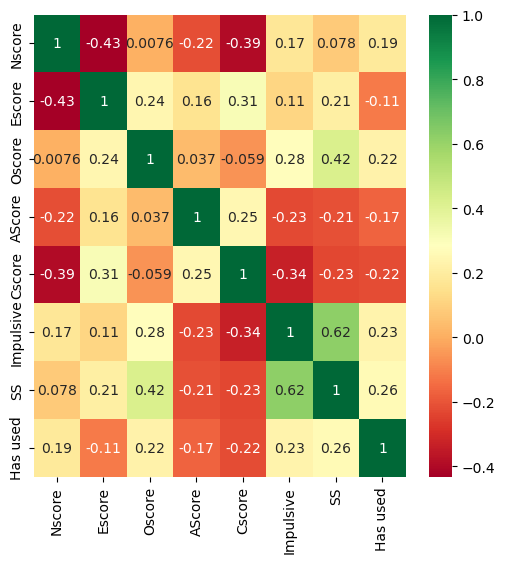

In [472]:
#Look at heatmap of only personality data + drug usage
_, ax = plt.subplots(figsize=(6,6))
columns = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Has used']
sns.heatmap(drugs_prep[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);

## <p align=center> Part II. Tree-based models

In this part, I'll apply tree-based models to predict drug consumption based on the already explored features.

In [473]:
#Create feature matrix

features = drugs_prep.drop("Has used", axis=1, inplace= False)
features.shape

(1876, 23)

In [474]:
#Create target variable
target = drugs_prep[["Has used"]]
target.shape

(1876, 1)

In [475]:
# Create split with Sklearn
x_train, x_test, y_train, y_test = train_test_split(features, target, 
                                   test_size = 0.3,random_state = 42)

# View the training and testing feature matrix 
x_train.shape, y_train.shape


((1313, 23), (1313, 1))

**1. Decision tree classifier**

The project deals with the question "Is an individual likely to engage in drug consumption based on their personality?" The expected answer is binary, either a person is a drug user or they are not. For this reason, the model I'll be using is a decision tree classifier.

The accuracy of the model's prediction on the test samples is:
0.698


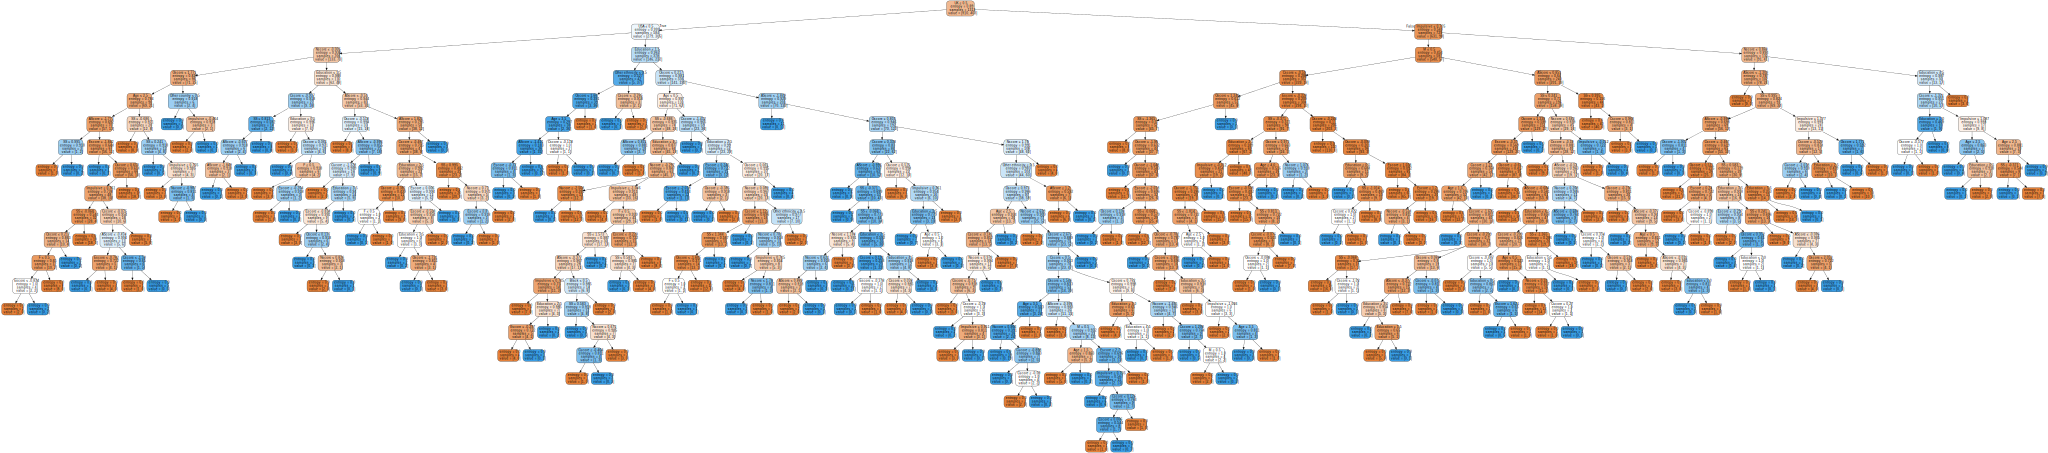

In [476]:
# Create a DecisionTreeClassifier 

# Regarding the selection of criterion, I'll start with entropy. According to
# Géron (2019), most of the time gini and entropy create similar trees but 
# sometimes they can differ as the Gini criterion tends to create an isolated
# branch for the most frequent class. In this case, the most frequent class
# corresponds to non-users and I don't want to isolate them because drugs usage
# is complex and multi-dimensional. Isolating one group would imply that the two
# groups (drug user vs. non user) are completely different when
# this is probably not the case. The fact that we can use personality to 
# predict drug consumption does not mean we're expecting two totally different
# types of 
# people that could be separated from each other on two tree branches;
# instead, what may be a predictor is the interaction of different dimensions of
# personality and the demographic data. 

dt1 = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)

#Fit the DecisionTreeClassifier on the training set
dt1.fit(x_train, y_train)

#Evaluate model performance
print("The accuracy of the model's prediction on the test samples is:")
print(float("{:.3f}".format(dt1.score(x_test, y_test))))

#Plot the DecisionTreeClassifier
dt1_data = tree.export_graphviz(dt1, out_file=None,
                                feature_names=features.columns,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dt1_data)
graph



Examining the graph reveals the model's complex nature, aligning with the complicated subject at hand. As previously mentioned, the expectation doesn't involve perfectly clear distinctions between entirely different groups of individuals. The complex nature of personality and the associated risks of drug consumption necessitates a nuanced approach. Rather than attributing these risks to a single factor, the model visually demonstrates how the same features are considered multiple times and they influence decisions across various nodes. My hypothesis is that for a complex subject, the model should also be complex. 

The score of 0.698 seems good enough for me within this specific context, since there are inherent challenges in accurately predicting a multifaceted phenomenon like drug consumption. While committed to refining the model, it's important to recognize the limitations in predicting such complex issues.



The accuracy of the model's prediction on the test samples is:
0.757


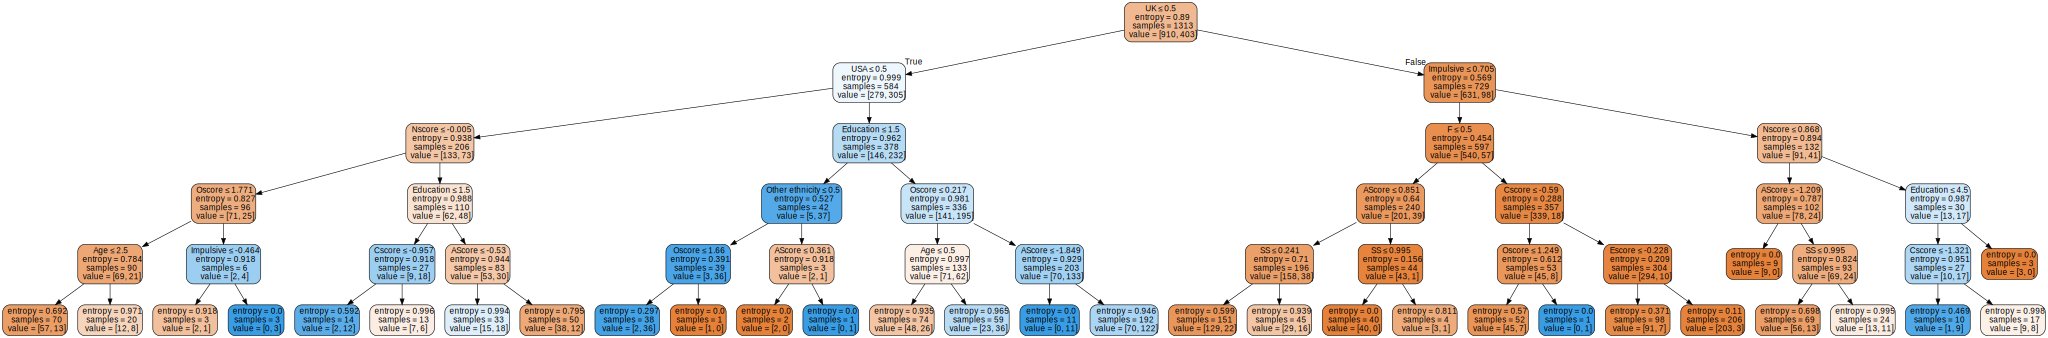

In [477]:
#Next, we'll try a second approach of limiting the maximum depth. Even though
#as already mentioned, the subject is complex by its nature, we'll explore what
#happens to assess the previous hypothesis which suggested that
#a complex model should make
#sense in this context. Will establishing a maximun depth reduce the accuracy? 

dt2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, 
                                                      random_state=42)

#Fit the DecisionTreeClassifier on the training set
dt2.fit(x_train, y_train)

#Evaluate model performance
print("The accuracy of the model's prediction on the test samples is:")
print(float("{:.3f}".format(dt2.score(x_test, y_test))))

#Plot the DecisionTreeClassifier
dt2_data = tree.export_graphviz(dt2, out_file=None,
                                feature_names=features.columns,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dt2_data)
graph

In [478]:
#Contrary to my previous hypothesis, the model does improve its accuracy by
#limiting the depth. Hence, I'll play around with different depths to see how
#it changes.

for x in range(1,21):
    dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=x, 
                                                      random_state=42)
    dt.fit(x_train, y_train)
    print("The accuracy of the model's prediction with max_depth {} on the test"
         " samples is:".format(x))
    print(float("{:.3f}".format(dt.score(x_test, y_test))))

The accuracy of the model's prediction with max_depth 1 on the test samples is:
0.725
The accuracy of the model's prediction with max_depth 2 on the test samples is:
0.774
The accuracy of the model's prediction with max_depth 3 on the test samples is:
0.776
The accuracy of the model's prediction with max_depth 4 on the test samples is:
0.732
The accuracy of the model's prediction with max_depth 5 on the test samples is:
0.757
The accuracy of the model's prediction with max_depth 6 on the test samples is:
0.746
The accuracy of the model's prediction with max_depth 7 on the test samples is:
0.735
The accuracy of the model's prediction with max_depth 8 on the test samples is:
0.726
The accuracy of the model's prediction with max_depth 9 on the test samples is:
0.712
The accuracy of the model's prediction with max_depth 10 on the test samples is:
0.709
The accuracy of the model's prediction with max_depth 11 on the test samples is:
0.687
The accuracy of the model's prediction with max_dept

The best model appears to be the one that uses a max_depth of 3. I'll plot it to see how it looks. 

The accuracy of the model's prediction on the test samples is:
0.776


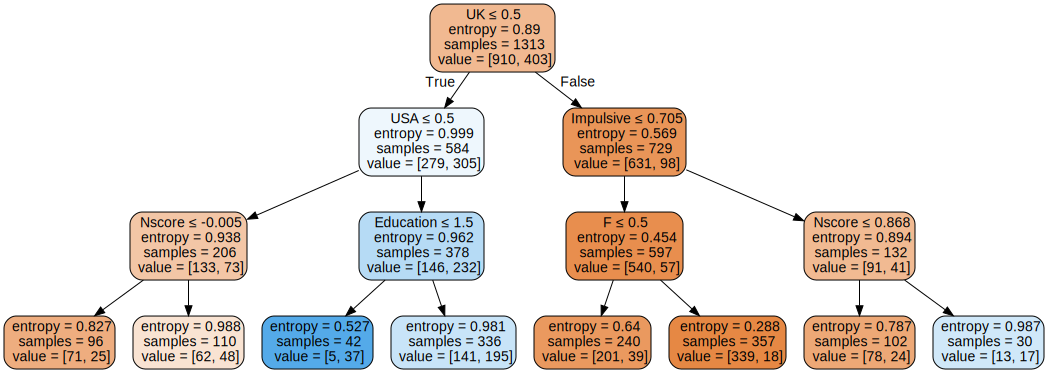

In [479]:
dt3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                                      random_state=42)

#Fit the DecisionTreeClassifier on the training set
dt3.fit(x_train, y_train)

#Evaluate model performance
print("The accuracy of the model's prediction on the test samples is:")
print(float("{:.3f}".format(dt3.score(x_test, y_test))))

#Plot the DecisionTreeClassifier
dt3_data = tree.export_graphviz(dt3, out_file=None,
                                feature_names=features.columns,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dt3_data)
graph

As we can see, the country, education and gender appear to be influencing the outcome. Regarding personality, we only see the Impulsiveness and Neuroticism (Nscore) being considered. Next, we'll explore what happens if we drop the demographic data and stay only with the 7 personality measures.

In [480]:
#Create new feature matrix
drugs_just_personality = drugs_prep[["Nscore", "Escore", "Oscore", "AScore", "Cscore", "Impulsive", "SS"]]

#Create new split
x_train, x_test, y_train, y_test = train_test_split(drugs_just_personality, target, 
                                   test_size = 0.3,random_state = 42)

#Loop again through several decision trees with different max_depth
for x in range(1,21):
    dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=x, 
                                                      random_state=42)
    dt.fit(x_train, y_train)
    print("The accuracy of the model's prediction with max_depth {} on the test"
         " samples is:".format(x))
    print(float("{:.3f}".format(dt.score(x_test, y_test))))


The accuracy of the model's prediction with max_depth 1 on the test samples is:
0.694
The accuracy of the model's prediction with max_depth 2 on the test samples is:
0.707
The accuracy of the model's prediction with max_depth 3 on the test samples is:
0.707
The accuracy of the model's prediction with max_depth 4 on the test samples is:
0.707
The accuracy of the model's prediction with max_depth 5 on the test samples is:
0.686
The accuracy of the model's prediction with max_depth 6 on the test samples is:
0.718
The accuracy of the model's prediction with max_depth 7 on the test samples is:
0.698
The accuracy of the model's prediction with max_depth 8 on the test samples is:
0.68
The accuracy of the model's prediction with max_depth 9 on the test samples is:
0.67
The accuracy of the model's prediction with max_depth 10 on the test samples is:
0.67
The accuracy of the model's prediction with max_depth 11 on the test samples is:
0.668
The accuracy of the model's prediction with max_depth 1

It can be seen that a model with max_depth 6 creates the best model when taking only personality into consideration. Lets see how it looks

The accuracy of the model's prediction on the test samples is:
0.718


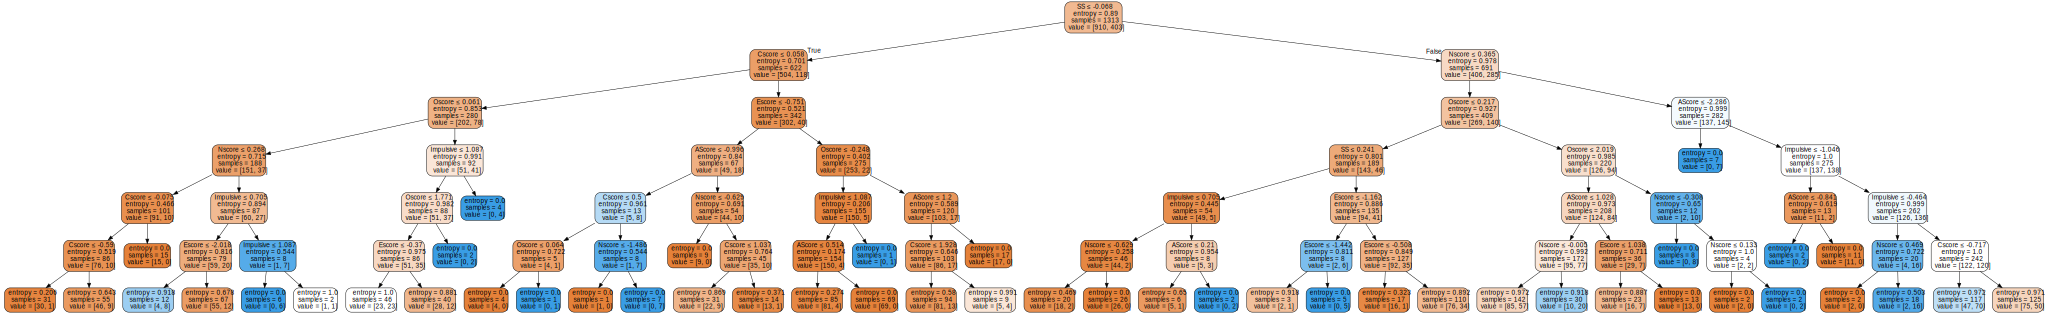

In [481]:
dt4 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, 
                                                      random_state=42)

#Fit the DecisionTreeClassifier on the training set
dt4.fit(x_train, y_train)

#Evaluate model performance
print("The accuracy of the model's prediction on the test samples is:")
print(float("{:.3f}".format(dt4.score(x_test, y_test))))

#Plot the DecisionTreeClassifier
dt4_data = tree.export_graphviz(dt4, out_file=None,
                                feature_names=drugs_just_personality.columns,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dt4_data)
graph

The score is not so different than that of the complete feature matrix when the max_depth is set to 3. What I can conclude of this, is that with demographic data it's easier to predict with fewer variables, but when we only have personality, the interaction between the different dimensions of it is more complex (as I first hypothesized). Since the score is pretty decent, I'll keep trying to fine tune  the model in this last dataset (just personality) since the goal of the project is focused on personality and its impact would be clearer if I just isolate it. 

Before, I stated that we cannot consider drug users and non users as if they were two totally different types of people. However, when removing the demographic data we're isolating personality from the rest of data that constitutes a human being (their age, sex, etc.). What if we could see two different types of personality in this case? Of course that when personality interacts with the demographics and life experiences, it's very complex (as I mentioned earlier), but it could be possible to indeed find certain patterns of personality that create a better prediction for drug usage. For this reason, I'll try the gini approach to see if it does a better separation between users and non users. 

In [482]:
#Loop again through several decision trees with different max_depth and gini
#criterion
for x in range(1,10):
    dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=x, 
                                                      random_state=42)
    dt.fit(x_train, y_train)
    print("The accuracy of the model's prediction with max_depth {} on the test"
         " samples is:".format(x))
    print(float("{:.3f}".format(dt.score(x_test, y_test))))

The accuracy of the model's prediction with max_depth 1 on the test samples is:
0.694
The accuracy of the model's prediction with max_depth 2 on the test samples is:
0.707
The accuracy of the model's prediction with max_depth 3 on the test samples is:
0.705
The accuracy of the model's prediction with max_depth 4 on the test samples is:
0.702
The accuracy of the model's prediction with max_depth 5 on the test samples is:
0.693
The accuracy of the model's prediction with max_depth 6 on the test samples is:
0.721
The accuracy of the model's prediction with max_depth 7 on the test samples is:
0.67
The accuracy of the model's prediction with max_depth 8 on the test samples is:
0.686
The accuracy of the model's prediction with max_depth 9 on the test samples is:
0.663


For gini criterion, we do get a slightly more accurate model with the same max_depth of 6. Let's plot it to see how it looks

The accuracy of the model's prediction on the test samples is:
0.721


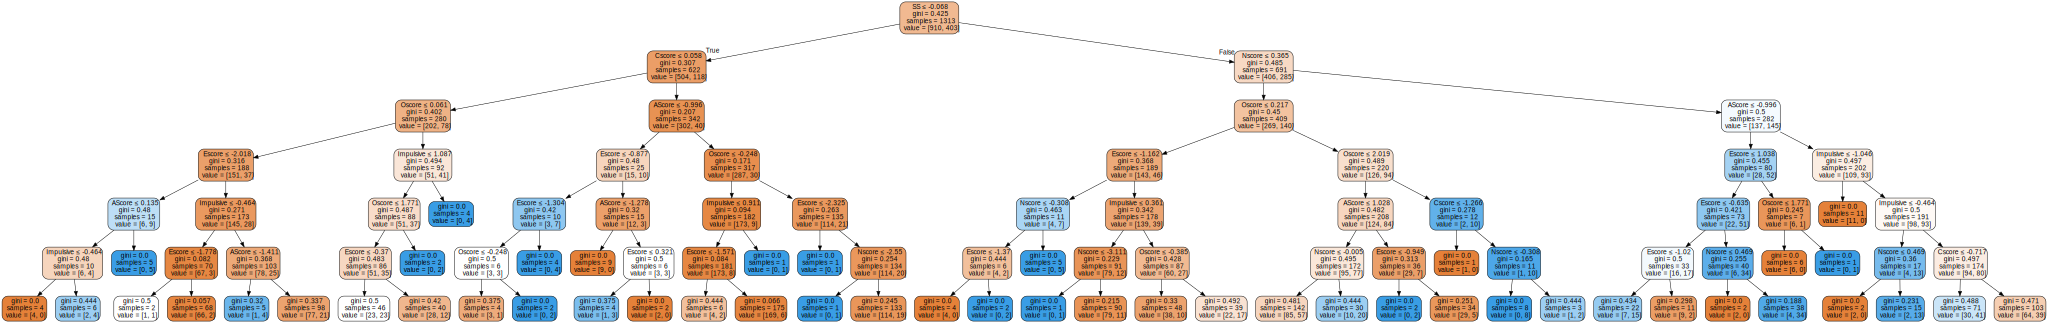

In [483]:
dt5 = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, 
                                                      random_state=42)

#Fit the DecisionTreeClassifier on the training set
dt5.fit(x_train, y_train)

#Evaluate model performance
print("The accuracy of the model's prediction on the test samples is:")
print(float("{:.3f}".format(dt5.score(x_test, y_test))))

#Plot the DecisionTreeClassifier
dt5_data = tree.export_graphviz(dt5, out_file=None,
                                feature_names=drugs_just_personality.columns,
                                class_names=None,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(dt5_data)
graph

Next, I'll explore the feature importance for this last model

In [484]:
# Extract feature names of best performing model
features = dt5.feature_names_in_
# extract feature importance
importance = np.round(dt5.feature_importances_,2)

# Create pandas dataframe of feature and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'Feature', 1:'Importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['Importance'], ascending=False, inplace=True)

# Show dataframe
df_importance.reset_index(drop=True)

,Feature,Importance
0,Escore,0.21
1,SS,0.19
2,Oscore,0.16
3,Nscore,0.14
4,Impulsive,0.12
5,AScore,0.11
6,Cscore,0.07


I can see that Extraversion and Sensation Seeking are the dimensions of personality that influence more the risk of drug consumption. It makes sense that Sensation Seeking affects because this measures how prone is a person to look for new, stimulating activities. It could be that they try drugs in an attempt to be stimulated. 

Regarding Extraversion, it is also known that groups and peers can also influence drug consumption, so I could hypothesize that when being more extraverted, people interact with more diverse groups that can influence drugs consumption (not meaning that being an extraverted automatically puts you at risk of being a drug user)

I was surprised to see that Conscientiousness plays the smaller role, because highly conscientious people tend to have more self-control that could reduce the risk of drugs consumption.

In summary, I believe that the approach of using a DTC has the advantage of its logic being very intuitive to understand; however, a disadvantage is that when they have multiple levels of nodes, it becomes less and less easy to interpret by just visualizing. Even if the concept and process is easy to understand, it gets complex when the same feature is being evaluated multiple times, so it ends up being less intuitive. Also, DT can be easily affected by variations on the training data (Gerón, 2019).

**2. Random Forest Classifier**

Now, I'll create a Random Forest Classifier with the same parameters as the best tree classifier (gini criterion and max_depth of 6). Creating a Random Forest will create several Decision Tree Classifiers by selecting the best features among random subsets of features, generating new possibilities of different trees and comparing them to see which has the best performance (Gerón, 2019).

In [485]:
# Instantiate the model
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini',
                             max_depth=6, random_state = 42)

# Train RFC
rfc.fit(x_train, y_train)

# Evaluate the random forest classifier on test set
print("The accuracy of the Random Forest Classifier is:")
float("{:.3f}".format(rfc.score(x_test,y_test)))

The accuracy of the Random Forest Classifier is:


/Users/natashacarpcast/anaconda3/envs/perspectives2/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.728

In [486]:
#See shape of y variable
y_train.shape, y_test.shape

((1313, 1), (563, 1))

In [487]:
#I do not know why I'm getting the warning because the shape seeps fine. 
#However, I'll use the method the warning suggests

# Instantiate the model
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini',
                             max_depth=6, random_state = 42)

# Train RFC
rfc.fit(x_train, np.ravel(y_train))

# Evaluate the random forest classifier on test set
print("The accuracy of the Random Forest Classifier is:")
float("{:.3f}".format(rfc.score(x_test,np.ravel(y_test))))

The accuracy of the Random Forest Classifier is:


0.728

Now I will obtain the feature importance on the RFC

In [488]:
# Extract feature names 
features = rfc.feature_names_in_
# Extract feature importance
importance = np.round(rfc.feature_importances_,2)

# Create pandas dataframe of feature and correpsonding importance
df_importance = pd.DataFrame([features, importance]).T
df_importance.rename(columns={0: 'Feature', 1:'Importance'}, inplace=True)

# Sort descendingly based on importance
df_importance.sort_values(['Importance'], ascending=False, inplace=True)

# Show dataframe
df_importance.reset_index(drop=True)


,Feature,Importance
0,Oscore,0.19
1,Nscore,0.16
2,SS,0.15
3,Cscore,0.14
4,Escore,0.12
5,AScore,0.12
6,Impulsive,0.12


It can be observed that the model improves very slightly when using the Random Forest Classifier. However, regarding feature importance, it can be seen that Openness, Neuroticism and Conscientiousness play a greater role in this model (compared to the DTC); as opposed to Sensation Seeking, Extraversion and Impulsiveness which weights are reduced. This conclusions are more reliable.

In comparison to the DTC, we can see that this model has the advantage of trying different DTC and choosing the best among them. It's very useful because it tries 100 trees in less than a second, simplyfing the human work. Also, its feature importances are more reliable since the model measures impurity in all the trees (Gerón, A.) However, since it aggregates all the trees, it also boosts over-fitting. 

**2. Tree-based models conclusion**

In this assignment I used a Decision Tree Classifier and a Random Forest Classifier to predict drug consumption. First, I used DTC on a complete dataset which included demographics + personality data. I got fairly accurate results but I decided to try on a dataset that only included personality (in an attempt to isolate the independent variable of my interest). I realized that by droping the personality data, I still got a good enough accuracy (72%) for the context of a really complex subject. Then, I evaluated a RFC and there was no significant improvement in relation to the DTC.

Regarding entropy and gini as criterion, it was observed that gini performs slightly better. Gini is supposed to create more isolated branches sometimes, but this was not seen in my model. Instead, the nodes and branches were similarly distributed as when using the entropy criterion. 

When testing out different max_depths with both gini and entropy criterion, it was seen that the best accuracy was achieved with levels between 2-6, with the peak at the max_depth=6. Models with more than 6 levels tended to reduce the accuracy as the max_depth increased. I can conclude that there should be a balance on the level of complexity, where it should not be too simple or too complex. 

Lastly, I was able to see that the features importance was different between the DTC and the RFC.

Overall, I think the tree-based models work fine for answering this research question. The goal of this project is not achieving modeling perfection. Instead, it seeks to develop a sufficiently good model capable of providing insightful observations on the relationship between personality traits and drug consumption. In the realm of psychology, where certainty is impossible, the objective is not to find definitive answers but to enhance understanding. The ultimate aim is to leverage this understanding to tailor more effective treatments and interventions, acknowledging the nuanced nature of human behavior and substance use.

## <p align=center> Part III. Linear models

The framework for applying linear models to classification tasks is based on the idea of treating predictions as probabilities. In essence, we estimate the likelihood of a particular sample belonging to a class. By establishing a threshold, we can determine whether the predicted probability surpasses it; if so, the model classifies the sample accordingly.

While it may seem theoretically possible to consider using linear regression, especially when one class is encoded as 0 and the other as 1, this approach poses significant challenges. Linear regression models can yield predictions beyond the 0 to 1 range, which contradicts the fundamental concept of probabilities. To ensure outputs stay within the probability range, a more appropriate choice is to use models specifically designed for classification tasks, such as the logistic regression model. This model incorporates the logistic function, which restricts predictions to the range of 0 to 1, aligning with the requirements of probability estimation. Hence, the logistic regression model serves as a more suitable alternative for this classification task. (James et al., 2023)

**2. Using L1 penalty**


In [489]:
#First, I will use a Logistic Regression model with L1 penalty, also known as
#Lasso regularization. By applying penalties, we aim to regularize the model,
#thereby reducing overfitting, enhancing robustness, and simplifying the model.

#The L1 penalty has a unique characteristic of driving certain weights to zero,
#making it particularly beneficial for feature selection. Consequently, features
#associated with zero coefficients can be deemed unimportant for the prediction
#task. Thus, through L1 regularization, we not only improve model performance
#but also gain insights into the significance of individual features.

#Regarding the solver, I'll use saga since it's faster to handle
#large datasets. 

#For the C value (inverse of regularization strenght) I'll start with the
#default (1)

clf = LogisticRegression(random_state=42, solver='saga', 
                        penalty='l1').fit(x_train, np.ravel(y_train))

print("The score for the Logistic Regression model with C=1 and penalty L1 is:")
clf.score(x_test, y_test)


The score for the Logistic Regression model with C=1 and penalty L1 is:


0.7300177619893428

In [490]:
#Now, we'll explore the coefficients given to each feature in this model 

df = pd.DataFrame({'Features': clf.feature_names_in_, 
                   'Coefficients': np.round(np.ravel(clf.coef_),3)})

df

,Features,Coefficients
0,Nscore,0.178
1,Escore,-0.300
2,Oscore,0.447
3,AScore,-0.218
4,Cscore,-0.110
5,Impulsive,0.239
6,SS,0.324


In [491]:
#As seen on the dataframe, none of the coefficients were totally reduced to
#zero. While this is not necessarily problematic, it's uncommon for L1 penalty
#to don't reduce any coefficient to zero. This could be due to the solver or the
#C. Therefore, I'll try the default solver "liblinear"

clf2 = LogisticRegression(random_state=42, solver='liblinear', 
                        penalty='l1').fit(x_train, np.ravel(y_train))

print("The score for the Logistic Regression model with C=1 and penalty L1 is:")
clf2.score(x_test, y_test)


The score for the Logistic Regression model with C=1 and penalty L1 is:


0.7300177619893428

In [492]:
#Now, we'll explore the coefficients given to each feature in this model 

df = pd.DataFrame({'Features': clf2.feature_names_in_, 
                   'Coefficients': np.round(np.ravel(clf2.coef_),3)})

df

,Features,Coefficients
0,Nscore,0.177
1,Escore,-0.300
2,Oscore,0.447
3,AScore,-0.218
4,Cscore,-0.109
5,Impulsive,0.238
6,SS,0.324


In [493]:
#It can be observed that the solver does not make a difference. I'll try 
#reducing the C to a value even smaller than 1, since the smaller, the stronger
#the regularization

clf3 = LogisticRegression(random_state=42, solver='liblinear', 
                        penalty='l1', C=0.2).fit(x_train, np.ravel(y_train))

print("The score for the Logistic Regression model with C=0.2 and penalty L1 is:")
clf3.score(x_test, y_test)



The score for the Logistic Regression model with C=0.2 and penalty L1 is:


0.738898756660746

In [494]:
#Now, we'll explore the coefficients given to each feature in this model 

df = pd.DataFrame({'Features': clf3.feature_names_in_, 
                   'Coefficients': np.round(np.ravel(clf3.coef_),3)})

df

,Features,Coefficients
0,Nscore,0.171
1,Escore,-0.275
2,Oscore,0.422
3,AScore,-0.203
4,Cscore,-0.105
5,Impulsive,0.226
6,SS,0.310


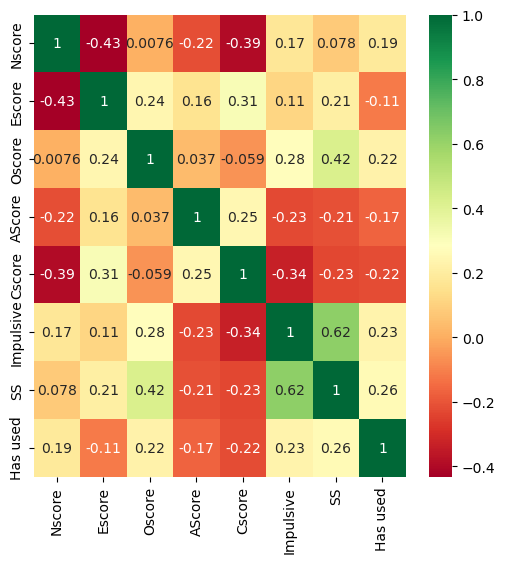

In [495]:
#So not even with a value as small as 0.2 the coefficients become zero. This
#means that the regularization would have to be extremely strong to penalize
#coefficients to zero. This could be due to some medium collinearity among some
#of the variables. Let's revisit the heatmap of the correlation between the
#personality dimensions

_, ax = plt.subplots(figsize=(6,6))
columns = ['Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Has used']
sns.heatmap(drugs_prep[columns].corr(),annot=True,cmap='RdYlGn', ax=ax);








**2. Exploring outcome when removing SS dimension**

An approach here could be to eliminate the Sensation Seeking dimension, since it's naturally correlated with "Openness to experience" and "Impulsive".

In [496]:
#Create new feature matrix
personality_without_ss = drugs_prep[["Nscore", "Escore", "Oscore", "AScore", "Cscore", "Impulsive"]]

#Create new split
x_train, x_test, y_train, y_test = train_test_split(personality_without_ss, target, 
                                   test_size = 0.3,random_state = 42)

In [497]:
#Now, we'll try again the same previous logistic regressor

clf4 = LogisticRegression(random_state=42, solver='liblinear', 
                        penalty='l1', C=0.2).fit(x_train, np.ravel(y_train))

print("The score for the Logistic Regression model with C=0.2 and penalty L1 is:")
clf4.score(x_test, y_test)

The score for the Logistic Regression model with C=0.2 and penalty L1 is:


0.7246891651865008

In [498]:
#Now, we'll explore the coefficients given to each feature in this model 

df = pd.DataFrame({'Features': clf4.feature_names_in_, 
                   'Coefficients': np.round(np.ravel(clf4.coef_),3)})

df

,Features,Coefficients
0,Nscore,0.179
1,Escore,-0.227
2,Oscore,0.487
3,AScore,-0.236
4,Cscore,-0.117
5,Impulsive,0.371


In [499]:
#Again, we don't see a difference in the coefficients but we do see a small
#decrease on the score. Actually, this score isn't completely useful because
#the data set is skewed as there are more non-users than users. Nevertheless,
#for the moment I'll stick with it as a reference before I evaluate it more
#holistically later. Taking just the accuracy then into consideration, I'll
#be using all the personality dimensions again (adding SS again).

#Return to previous dataframe
personality_without_ss = drugs_prep[["Nscore", "Escore", "Oscore", "AScore",
                                      "Cscore", "Impulsive", "SS"]]

#Create new split
x_train, x_test, y_train, y_test = train_test_split(personality_without_ss, target, 
                                   test_size = 0.3,random_state = 42)


**3. Using L2 penalty**

In [500]:

#At this point, I'll just continue with the L2 penalty. This one, instead of 
#reducing coefficients to zero, it's simply focused on penalizing large weights
#and it reduces them without making them actually zero. This could be
#a disadvantage in contexts where there are many features and the goal is to
#perform feature selection, but since I'm
#dealing with just a few here, the feature selection is not necessary. 

clf5 = LogisticRegression(random_state=42, solver='liblinear', 
                        penalty='l2', C=0.2).fit(x_train, np.ravel(y_train))

print("The score for the Logistic Regression model with C=0.5 and penalty L2 is:")
clf5.score(x_test, y_test)

The score for the Logistic Regression model with C=0.5 and penalty L2 is:


0.7317939609236235

In [501]:
#The score using L2 penalty is slightly less. Now, I'll see the coefficients

df = pd.DataFrame({'Features': clf5.feature_names_in_, 
                   'Coefficients': np.round(np.ravel(clf5.coef_),3)})

df

,Features,Coefficients
0,Nscore,0.178
1,Escore,-0.292
2,Oscore,0.438
3,AScore,-0.215
4,Cscore,-0.112
5,Impulsive,0.236
6,SS,0.319


In [502]:
#They look very similar than when using L1 penalty. Next, I'll explore using
#a new solver that only works with L2, the newton-cholesky. This solver is
#theoretically a good choice when you have more samples than features and
#when you have one-hot encoded categorical features. Since this is the case, 
#I'll explore its usage with different values of C.

c = [0.01, 0.09, 0.1, 0.5, 0.75, 1, 2]
scores = []

for c_value in c:
    clf = LogisticRegression(random_state=42, solver='newton-cholesky', 
                    penalty='l2', C=c_value).fit(x_train, np.ravel(y_train))
    
    score = clf.score(x_test, y_test)

    scores.append(score)

df = pd.DataFrame({'C value': c, 'Accuracy score': scores})
print(df)
    


   C value  Accuracy score
0     0.01        0.731794
1     0.09        0.733570
2     0.10        0.733570
3     0.50        0.730018
4     0.75        0.730018
5     1.00        0.730018
6     2.00        0.730018


In [503]:
#Using L2 with newton-cholesky solver does not change very much the score. 

#In all, the best model 
#throughout this exploration is apparently the clf3, the one that uses L1
#penalty and C=0.2.

print("Recall clf3 performance:")
print(np.round(clf3.score(x_test, y_test),3))

print("Recall clf3 coefficients:")

df = pd.DataFrame({'Features': clf3.feature_names_in_, 
                   'Coefficients': np.round(np.ravel(clf3.coef_),3)})

display(df)


Recall clf3 performance:
0.739
Recall clf3 coefficients:


,Features,Coefficients
0,Nscore,0.171
1,Escore,-0.275
2,Oscore,0.422
3,AScore,-0.203
4,Cscore,-0.105
5,Impulsive,0.226
6,SS,0.310


**4. Linear models conclusion**

Throughout this part I explored different parameters for a Logistic Regression model. The performance of the model didn't change drastically when exploring different parameters, but it was seen that very low C values are the ones that improve slightly the model's performance.

Compared to the best tree-based model, the best linear model improved the accuracy by just 1% (when dropping demographic data). Similarly to the tree-based models conclusion, the accuracy makes sense in the context. However, as it was mentioned before, this is a preliminary conclusion since the complete evaluation requires using more metrics and that will be done on the next step of this project. 




## <p align=center> Part IV. Evaluation and Validation

As mentioned on the previous part, further evaluation methods are needed in order to truly assess the models' performances. Since the dataset is skewed, we cannot rely solely on accuracy.

In this part I'll evaluate my previous tree-based and linear models using different metrics and criteria, allowing for a better comprehension of the models' performances. 

### Decision Tree Classifier - Evaluation and Validation

**1. Confusion matrix**

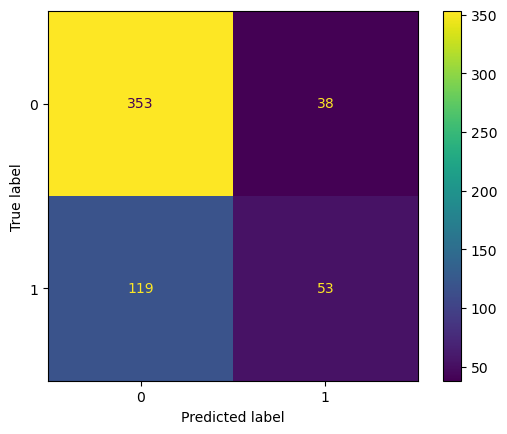

In [504]:
#Recall best previous decision tree classifier
dt5 = tree.DecisionTreeClassifier(criterion='gini', max_depth=6, 
                                                      random_state=42)

#Fit the DecisionTreeClassifier on the training set
dt5.fit(x_train, y_train)

#Use the classifier to predict Y values
y_pred = dt5.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=dt5.classes_)

disp.plot()
plt.show()


As seen in the confusion matrix, the decision tree classifier correctly predicts 353 non drug users and 53 drug users. On the other hand, it mistakes 119 users as non users and 38 non users as users. 

**2. Precision, recall and f1-score**

Next, I'll compute values for precision, recall and f1-score

In [505]:
print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       391
           1       0.58      0.31      0.40       172

    accuracy                           0.72       563
   macro avg       0.67      0.61      0.61       563
weighted avg       0.70      0.72      0.69       563



The recall for drug users is very low, meaning that the model is not correctly identifying them; instead, it is considering them as non-users (as it can also be seen on the confusion matrix).

On the other hand, it does a better job at predicting true non-users.

Basically, the model is biased to predicting non users.

**3. AUC-ROC**

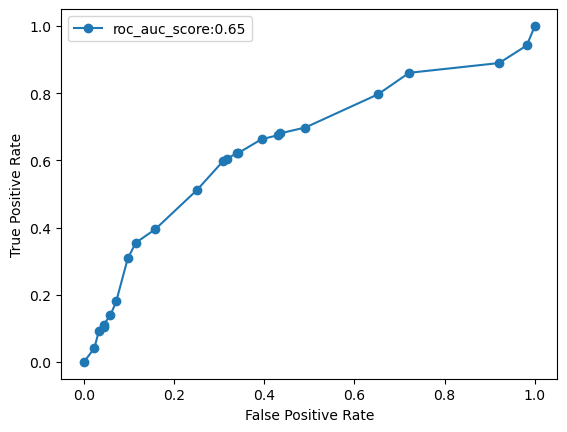

In [506]:
# Predict probabilities of each sample being classified as a drug user
y_prob = dt5.predict_proba(x_test)[:, 1]

# Compute ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

#Compute the ROC-AUC score
roc_score = roc_auc_score(y_test, y_prob)

#Show graph
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()


From the graph and the score we can see that the model performs poorly when trying to separate the two classes. It's only slightly better than a random classification (which would be of 0.5)

**4. Fine-tuning**

Next, I'll apply a GridSearchCV to try to find better hyperparameters for the Decision Tree and see if it can be improved

In [507]:
dt = tree.DecisionTreeClassifier(random_state=42)

hyperparameters = {'criterion': ['entropy', 'gini', 'log_loss'],
                   'max_depth': [x for x in range(1,20)], 
                   'min_samples_split': [x for x in range(2,50, 5)]}

grid_cv = GridSearchCV(estimator = dt, param_grid = hyperparameters, cv=5,
                       scoring= 'recall')

grid_cv.fit(drugs_just_personality, target)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 7, 12, 17, 22, 27, 32, 37, 42,
                                               47]},
             scoring='recall')

In [508]:
print(grid_cv.best_estimator_)
print(grid_cv.best_score_)


DecisionTreeClassifier(criterion='entropy', max_depth=19, random_state=42)
0.44521739130434784


**5. KFold cross validation**

In [509]:
#Next, I'll apply KFold cross validation to the identified best estimator

dtc = tree.DecisionTreeClassifier(max_depth=3, random_state=42)

#I'll use a stratified KFold to keep the class distribution, since the data is
#imbalanced
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using the recall metric because, for the specific 
#task, it is important to be able to recognize potential drug users. 
scores = cross_val_score(dtc, drugs_just_personality, target, cv=kf, 
                                                   scoring="recall")

print("Cross-validation scores:", scores)
print("Mean recall:", scores.mean())


Cross-validation scores: [0.4        0.1826087  0.23478261 0.28695652 0.15652174]
Mean recall: 0.25217391304347825


**6. Decision Tree Classifier conclusion**

After reviewing the model using various metrics, I've found my previous preliminary assessment incorrect, and actually find the Decision Tree Classifier useless. 

The model demonstrates a satisfactory overall accuracy, but this is only due to the imbalance in the dataset, which contains significantly more non-users than users.

Consequently, the model works well for predicting non-users but it does not effectively identify true users. 

Recall that the primary aim of the model is to pinpoint potential drug users for targeted preventive measures. Therefore, since the model's current performance does not align with this goal, it is useless.

### Random Forest Classifier - Evaluation and Validation

**1. Confusion matrix**

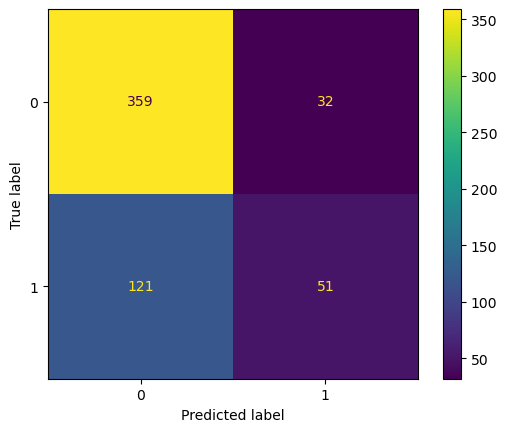

In [510]:
#Recall the best random forest classifier defined in Part II
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'gini',
                             max_depth=6, random_state = 42)

rfc.fit(x_train, np.ravel(y_train))

#Use the classifier to predict Y values
y_pred = rfc.predict(x_test)

cm = confusion_matrix(y_test, np.ravel(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rfc.classes_)

disp.plot()
plt.show()


This one is performing worse than the decision tree, since it's predicting more false negatives

**2. Precision, recall and f1-score**

In [511]:
print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.75      0.92      0.82       391
           1       0.61      0.30      0.40       172

    accuracy                           0.73       563
   macro avg       0.68      0.61      0.61       563
weighted avg       0.71      0.73      0.69       563



It does not make much difference because the decision tree was performing already very bad.

**3. AUC-ROC**

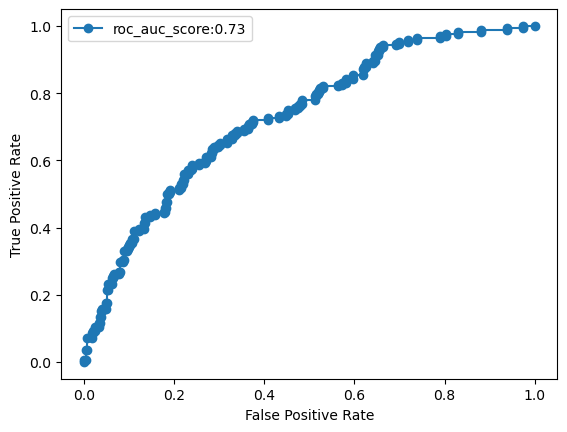

In [512]:
# Predict probabilities of each sample being classified as a drug user
y_prob = rfc.predict_proba(x_test)[:, 1]

# Compute ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

#Compute the ROC-AUC score
roc_score = roc_auc_score(y_test, y_prob)

#Show graph
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

The ROC-AUC score of the Random Forest is better than the Decision Tree's score. However, it is important to note that this could be due to the higher model complexity and overfitting. Hence, it does not  mean that the model performs well.

**4. Fine-tuning**

Next, I'll apply a GridSearchCV to try to find better hyperparameters for the Random Forest and see if it can be improved

In [513]:
rfc = RandomForestClassifier(random_state = 42)

hyperparameters = {'criterion': ['entropy', 'gini', 'log_loss'],
                   'max_depth': [x for x in range(1,15)], 
                   'min_samples_split': [x for x in range(2,15, 5)]}

grid_cv = GridSearchCV(estimator = rfc, param_grid = hyperparameters, cv=5,
                    scoring= 'recall')

grid_cv.fit(drugs_just_personality, np.ravel(target))

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'min_samples_split': [2, 7, 12]},
             scoring='recall')

In [514]:
print(grid_cv.best_estimator_)
print(grid_cv.best_score_)


RandomForestClassifier(criterion='entropy', max_depth=12, random_state=42)
0.34260869565217394


**5. KFold cross validation**

In [515]:
rfc = RandomForestClassifier(max_depth=5, random_state = 42)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using the recall metric because, for the specific 
#task, it is important to be able to recognize potential drug users. 
scores = cross_val_score(rfc, drugs_just_personality, np.ravel(target), cv=kf, 
                                                   scoring="recall")

print("Cross-validation scores:", scores)
print("Mean recall:", scores.mean())

Cross-validation scores: [0.22608696 0.23478261 0.22608696 0.24347826 0.15652174]
Mean recall: 0.2173913043478261


**6. Random Forest Classifier conclusion**

Following the same logic as in the previous model (the Decision Tree Classifier), I can conclude that the tree-based models are not working for this task. Could it be that the issue itself (drug consumption) is so complex and multifactorial that it is naive to try to predict it mathematically? I'll keep exploring with the linear models. 

### Logistic Regression - Evaluation and Validation

**1. Confusion matrix**

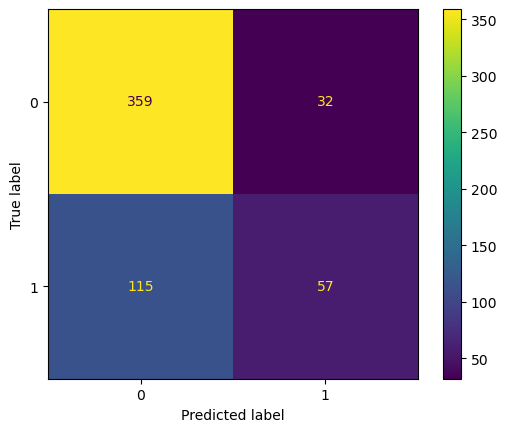

In [516]:
#Recall the best logistic regressor
clf3 = LogisticRegression(random_state=42, solver='liblinear', 
                        penalty='l1', C=0.2).fit(x_train, np.ravel(y_train))

clf3.fit(x_train, np.ravel(y_train))

#Use the classifier to predict Y values
y_pred = clf3.predict(x_test)

cm = confusion_matrix(y_test, np.ravel(y_pred))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=dt5.classes_)

disp.plot()
plt.show()

It can be seen from the above matrix that the logistic regressor does a slight better job at recalling the drug users. 

**2. Precision, recall and f1-score**

In [517]:
print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           0       0.76      0.92      0.83       391
           1       0.64      0.33      0.44       172

    accuracy                           0.74       563
   macro avg       0.70      0.62      0.63       563
weighted avg       0.72      0.74      0.71       563



**3. AUC-ROC**

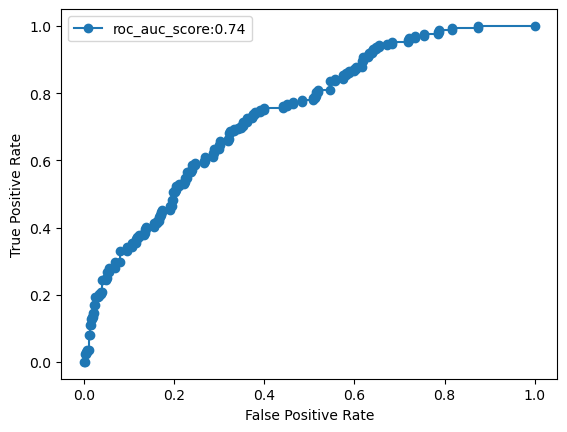

In [518]:
# Predict probabilities of each sample being classified as a drug user
y_prob = clf3.predict_proba(x_test)[:, 1]

# Compute ROC curve 
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=1)

#Compute the ROC-AUC score
roc_score = roc_auc_score(y_test, y_prob)

#Show graph
plt.plot(fpr,tpr,'o-',label="roc_auc_score:"+str(roc_score.round(2)))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

Regarding the ROC-AUC score, it's only 0.01 above the Random Forest Classifier, so it is not a significant improvement.

**4. Fine-tuning**

Next, I'll apply a GridSearchCV to try to find better hyperparameters for the Logistic Regressor and see if it can be improved

In [519]:
lr = LogisticRegression(random_state=42)

hyperparameters = {'penalty':('l1', 'l2'), 
              'C':[0.001, 0.01, 0.1, 1],
              'solver': ['liblinear', 'saga']} 

grid_cv = GridSearchCV(estimator = lr, param_grid = hyperparameters, cv=5,
                       scoring= 'recall')

grid_cv.fit(drugs_just_personality, np.ravel(target))

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ('l1', 'l2'),
                         'solver': ['liblinear', 'saga']},
             scoring='recall')

In [520]:
print(grid_cv.best_estimator_)
print(grid_cv.best_score_)

LogisticRegression(C=0.001, random_state=42, solver='liblinear')
0.42434782608695654


**5. KFold cross validation**

In [521]:
lr = LogisticRegression(random_state=42, C= 0.01, solver= 'liblinear')

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation using the recall metric because, for the specific 
#task, it is important to be able to recognize potential drug users. 
scores = cross_val_score(lr, drugs_just_personality, np.ravel(target), cv=kf, 
                                                   scoring="recall")

print("Cross-validation scores:", scores)
print("Mean recall:", scores.mean())


Cross-validation scores: [0.30434783 0.33913043 0.33043478 0.33913043 0.24347826]
Mean recall: 0.31130434782608696


**6. Logistic Regression conclusion**

It can be seen that a logistic regression's model recalls 10% better than the tree-based models. Nevertheless, the recall level is still very low

### Evaluation and Validation part - Conclusion

None of the models is actuallly doing a good job for predicting drug consumption, as opposed to what was previosly thought. I realized it's important to always assess model performance based on different criteria and not only one measure as accuracy. 

It is necessary to keep exploring to see if maybe using ensemble methods or deep learning allows for better predictions. 


## <p align=center> Part V. Deep Learning Model

In this part, I will explore deep learning models to predict drug consumption. These models are based on different layers of “neurons” that capture nuances and details of complex patterns, starting from the most basic patterns and getting more detailed through the layers. In theory, it could be useful to predict a complex phenomenon like the one we’re dealing with. However, I believe that achieving good performance could be difficult due to the lack of data. I think that 1876 observations may not be enough for this task, but I will still give it a try!

In [522]:
X = drugs_just_personality 
Y = target

#Split the data again to include validation data 

x_data, x_test, y_data, y_test = train_test_split(X, Y, test_size=0.2, 
                                                      random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size= 0.2,
                                                                random_state=42)

x_train.shape, x_val.shape, x_test.shape

((1200, 7), (300, 7), (376, 7))

In [523]:
#Create a Neural Network object. Leave hyperparameters that Prof. Wang suggested,
#since they're commonly used.

dl_model = Sequential(name="dl_model")
dl_model.add(Dense(60, input_shape=(7,), activation='relu', name= "layer1"))
dl_model.add(Dense(1, activation='sigmoid', name= "layer2"))

dl_model.summary()


Model: "dl_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 60)                480       
                                                                 
 layer2 (Dense)              (None, 1)                 61        
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


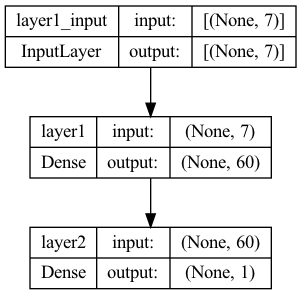

In [524]:
#Visualize the model structure and the shape to ensure it actually is what we're
#looking for
keras.utils.plot_model(dl_model, "binary_classifier.png", show_shapes=True) 

In [525]:
#Configure the training process
dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#Fit the model through 100 epochs so it can learn from the data multiple times
#and get better results (in theory!). 
history = dl_model.fit(x_train, y_train, batch_size=32, epochs=100, 
                                       validation_data=(x_val,y_val))

#Visualize the time, loss and accuracy obtained on each epoch of the model.
#This way, we can observe at which iteration the model gets a better performance

Epoch 1/100


38/38 [==============================] - 0s 2ms/step - loss: 0.6760 - accuracy: 0.6117 - val_loss: 0.5892 - val_accuracy: 0.7267
Epoch 2/100
38/38 [==============================] - 0s 748us/step - loss: 0.5847 - accuracy: 0.6875 - val_loss: 0.5488 - val_accuracy: 0.7200
Epoch 3/100
38/38 [==============================] - 0s 671us/step - loss: 0.5549 - accuracy: 0.7200 - val_loss: 0.5424 - val_accuracy: 0.7067
Epoch 4/100
38/38 [==============================] - 0s 1ms/step - loss: 0.5446 - accuracy: 0.7308 - val_loss: 0.5428 - val_accuracy: 0.7033
Epoch 5/100
38/38 [==============================] - 0s 720us/step - loss: 0.5404 - accuracy: 0.7292 - val_loss: 0.5417 - val_accuracy: 0.7133
Epoch 6/100
38/38 [==============================] - 0s 656us/step - loss: 0.5371 - accuracy: 0.7300 - val_loss: 0.5432 - val_accuracy: 0.7067
Epoch 7/100
38/38 [==============================] - 0s 636us/step - loss: 0.5352 - accuracy: 0.7283 - val_loss: 0.5442 - val_accuracy: 0.7067
Epoch 8/100
38/

In [526]:
#We can observe that the model does get better with time regarding accuracy, but
#as mentioned earlier, accuracy is not as important in this case as much as 
#recall is. For that reason, I'll explore the model by changing the metric.

dl_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Recall()])
history = dl_model.fit(x_train, y_train, batch_size=32, epochs=100, 
                                       validation_data=(x_val,y_val))

Epoch 1/100


38/38 [==============================] - 0s 2ms/step - loss: 0.4975 - recall_8: 0.4409 - val_loss: 0.5607 - val_recall_8: 0.3210
Epoch 2/100
38/38 [==============================] - 0s 862us/step - loss: 0.4947 - recall_8: 0.4357 - val_loss: 0.5528 - val_recall_8: 0.2840
Epoch 3/100
38/38 [==============================] - 0s 754us/step - loss: 0.4942 - recall_8: 0.4173 - val_loss: 0.5567 - val_recall_8: 0.2963
Epoch 4/100
38/38 [==============================] - 0s 769us/step - loss: 0.4940 - recall_8: 0.4383 - val_loss: 0.5562 - val_recall_8: 0.2840
Epoch 5/100
38/38 [==============================] - 0s 773us/step - loss: 0.4945 - recall_8: 0.4331 - val_loss: 0.5560 - val_recall_8: 0.3086
Epoch 6/100
38/38 [==============================] - 0s 788us/step - loss: 0.4935 - recall_8: 0.4147 - val_loss: 0.5569 - val_recall_8: 0.3086
Epoch 7/100
38/38 [==============================] - 0s 734us/step - loss: 0.4939 - recall_8: 0.4514 - val_loss: 0.5573 - val_recall_8: 0.2963
Epoch 8/100
3

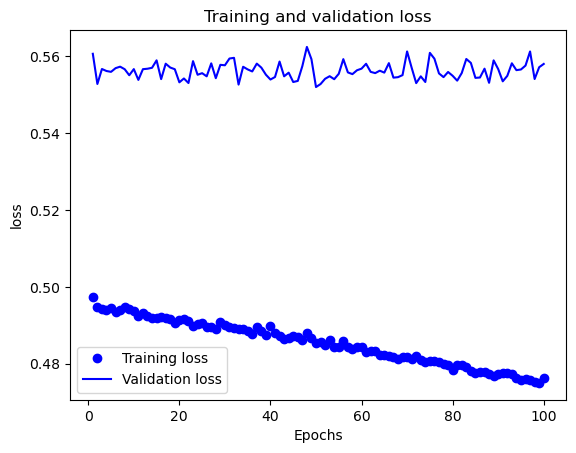

In [527]:
def visualize_performance(flag):
  history_dict = history.history
  epochs = range(1, len(history_dict["loss"]) + 1)

  plt.plot(epochs, history_dict[flag], "bo", label="Training "+flag)
  plt.plot(epochs, history_dict["val_"+flag], "b", label="Validation "+flag)
  plt.title("Training and validation "+flag)
  plt.xlabel("Epochs")
  plt.ylabel(flag)
  plt.legend()
  plt.show()


visualize_performance(flag = "loss")

In [528]:
#It could be that the model is too complex for simple
#data. As I initially thought, maybe this is not a right model for a data set
#as mine because I only have 1876 samples and neural networks work with very
#large data. Nevertheless, I'll try playing around by decreasing the number of
#neurons to reduce the complexity.

dl_model4 = Sequential(name="dl_model4")
dl_model4.add(Dense(30, input_shape=(7,), activation='relu', name= "layer1"))
dl_model4.add(Dense(1, activation='sigmoid', name= "layer2"))

dl_model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=[Recall()])
history = dl_model4.fit(x_train, y_train, batch_size=32, epochs=100, 
                                       validation_data=(x_val,y_val))



Epoch 1/100


38/38 [==============================] - 0s 2ms/step - loss: 0.7454 - recall_9: 0.7008 - val_loss: 0.7077 - val_recall_9: 0.5309
Epoch 2/100
38/38 [==============================] - 0s 720us/step - loss: 0.6487 - recall_9: 0.4541 - val_loss: 0.6357 - val_recall_9: 0.3333
Epoch 3/100
38/38 [==============================] - 0s 662us/step - loss: 0.5936 - recall_9: 0.3727 - val_loss: 0.5955 - val_recall_9: 0.2840
Epoch 4/100
38/38 [==============================] - 0s 661us/step - loss: 0.5641 - recall_9: 0.3675 - val_loss: 0.5799 - val_recall_9: 0.2963
Epoch 5/100
38/38 [==============================] - 0s 659us/step - loss: 0.5489 - recall_9: 0.3465 - val_loss: 0.5704 - val_recall_9: 0.2963
Epoch 6/100
38/38 [==============================] - 0s 660us/step - loss: 0.5412 - recall_9: 0.3570 - val_loss: 0.5678 - val_recall_9: 0.2963
Epoch 7/100
38/38 [==============================] - 0s 657us/step - loss: 0.5376 - recall_9: 0.3648 - val_loss: 0.5656 - val_recall_9: 0.2963
Epoch 8/100
3

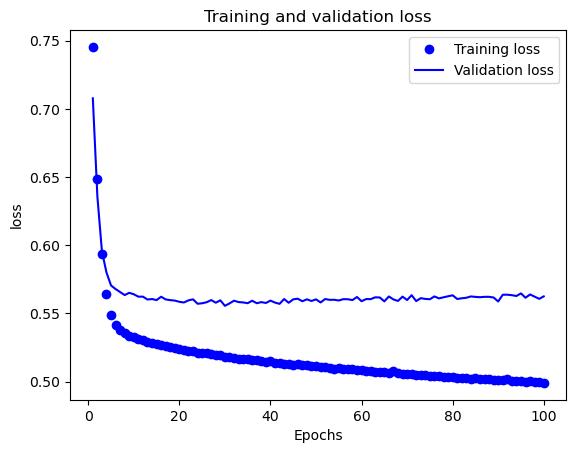

In [529]:
visualize_performance(flag = "loss")

In [530]:
#It is observed that the model learns at the beginning but then it 
#remains stable, meaning that the model does not learn more through several
#epochs and it reaches it best capacity through the first ones. 

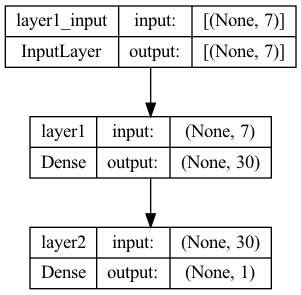

In [531]:
keras.utils.plot_model(dl_model4, "binary_classifier.png", show_shapes=True) 

In [532]:
y_pred_prob = dl_model4.predict(x_test)
y_pred_labels = (y_pred_prob > 0.5).astype(int)
print(classification_report(y_test, y_pred_labels))

 1/12 [=>............................] - ETA: 0s

12/12 [==============================] - 0s 380us/step
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       263
           1       0.54      0.33      0.41       113

    accuracy                           0.72       376
   macro avg       0.65      0.60      0.61       376
weighted avg       0.69      0.72      0.69       376



In [533]:
#As with previous models, we can observe that the model is capable of detecting
#non-users with high recall, but uncapable of identifying the real users.
#Hence, it's not adequate for this task. 

### Deep Learning Model - Conclusion

Comparing the DL model with traditional ML models, we don't see any differences in the performance for this task. 

As we reviewed in class, deep learning models are capable of capturing nuances better and find patterns that traditional ML can not. Thus, it appears as if a DL model could be useful for predicting a complex/multi-factorial phenomena such as drug consumption. 

However, one key element of DL is that it requires more data and computational resources. Therefore, this model is inherently flawed because I'm not using enough data. 

It would be interesting to know if this model would work if I had access to more samples. 

## <p align=center> Bibliography

* Big Five personality traits and illicit drug use: Specificity in trait–drug associations: https://psycnet.apa.org/record/2022-02063-001
* Personality traits and substance use disorders: Comparative study with drug user and non-drug user population: http://proxy.uchicago.edu/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=edswss&AN=000474326100009&site=eds-live&scope=site
* Personality and performance: moving beyond the Big 5: https://www.sciencedirect.com/science/article/pii/S2352250X16301427?casa_token=38D4M-bf5S4AAAAA:BQKsII4Zu7RJTpL-cMCeLVeqdbYxjrDcMTSjhb5HWPG87GNrLuthZJST9ZEtR6z2eiw7fCA3
* Relationships between the big five personality characteristics and performance on behavioral decision making tasks: https://www.sciencedirect.com/science/article/pii/S0191886920301203?casa_token=R_U8Xujy-kUAAAAA:5cqT-Xu9Z9Fyo8FeoPqqSy_tNUW0FvQXHkiFGRgRUFcoY8of35SouFn7jrfQ6fNuWE_CuirV 
* The Five Factor Model of personality and evaluation of drug consumption risk https://arxiv.org/pdf/1506.06297.pdf
* Big Five personality traits predict illegal drug use in young people : http://proxy.uchicago.edu/login?url=https://search.ebscohost.com/login.aspx?direct=true&db=edselp&AN=S0001691822003092&site=eds-live&scope=site
* https://www.cdc.gov/drugoverdose/deaths/index.html#:~:text=Drug%20Overdose%20Deaths%20Remained%20High,1999%20from%20a%20drug%20overdose.&text=In%202021%2C%20106%2C699%20drug%20overdose%20deaths%20occurred%20in%20the%20United%20States.
* Fehrman, E., Muhammad, A. K., Mirkes, E. M., Egan, V., & Gorban, A. N. (2017). The five factor model of personality and evaluation of drug consumption risk. In Data science: innovative developments in data analysis and clustering (pp. 231-242). Springer International Publishing.
* United Nations Office on Drugs and Crime, World Drug Report 2017 (ISBN: 978-92-1-148291-1, eISBN: 978-92-1-060623-3, United Nations publication, Sales No. E.17.XI.6).
* Hser, Y. I., Huang, D., Brecht, M. L., Li, L., & Evans, E. (2008). Contrasting trajectories of heroin, cocaine, and methamphetamine use. Journal of addictive diseases, 27(3), 13–21. https://doi.org/10.1080/10550880802122554
* Gerón, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O’Reilly.
* https://www.kaggle.com/datasets/obeykhadija/drug-consumptions-uci
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html
* James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). An Introduction to Statistical Learning (1st ed.). Springer Cham.
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html